In [2]:
import pyscf
import numpy as np
import matplotlib.pyplot as plt
import math
import import_ipynb
import pyscf.fci
import functions


In [9]:
bond_lengths_h = np.arange(2.0, 3.0, 0.2)
entropies = []
energies = []
von_entropies = []
total_entropies = []

# Loop over bond lengths
for l in bond_lengths_h:
    mol = pyscf.M(
        atom = f'H 0 0 0; H {l} 0 0; H {2*l} 0 0; H {3*l} 0 0',  # in Angstrom
        basis = 'sto3g',
        symmetry = False,
        spin = 0
    )
    
    # Perform Hartree-Fock calculation
    myhf = pyscf.scf.RHF(mol)
    myhf.diis_space = 16
    myhf.conv_tol = 1e-14
    myhf.max_cycle = 3000
    myhf.kernel()
    
    hf_fci = pyscf.fci.FCI(mol, myhf.mo_coeff)
    hf_fci.verbose = 5
    hf_fci.conv_tol = 1e-15
    hf_fci.max_cycle = 2500
    hf_fci.max_space = 500
    e_hf_fci, ci_hf = hf_fci.kernel()

    # Calculate the full 1-RDM
    mo_coeffs = []
    names_of_orbitals = ['HF', 'Boys', 'Edmiston', 'Natural']
    # Construct different types of orbitals
    mo_coeffs.append(myhf.mo_coeff.copy())
    mo_coeffs.append(pyscf.lo.boys.Boys(mol, myhf.mo_coeff).kernel())
    edmiston = pyscf.lo.edmiston.Edmiston(mol, myhf.mo_coeff)
    edmiston.conv_tol = 1e-15
    edmiston.max_cycle = 2500
    edmiston.max_space = 500
    edmiston.verbose = 5
    mo_coeffs.append(edmiston.kernel())
    
    ed_fci = pyscf.fci.FCI(mol, mo_coeffs[2])
    # ed_fci.verbose = 5
    ed_fci.conv_tol = 1e-15
    ed_fci.max_cycle = 2500
    ed_fci.max_space = 500
    e_ed_fci, ci_ed = ed_fci.kernel()
    mo_coeffs.append(make_no(ed_fci, ci_ed, myhf, mo_coeffs[2]))

    entropies_ = []
    energies_ = []
    von_entropies_ = []
    total_entropies_ = []
    for mo in mo_coeffs:
        cisolver_fci = pyscf.fci.FCI(mol, mo)
        cisolver_fci.conv_tol = 1e-14
        cisolver_fci.max_cycle = 1500
        cisolver_fci.max_space = 500
        efci_fci, ci_fci = cisolver_fci.kernel()
        print(efci_fci)
        ci_fci = ci_fci.flatten()
        full_rdm1 = cisolver_fci.make_rdm1(ci_fci, mo.shape[0], myhf.mol.nelectron)
        full_rdm2 = cisolver_fci.make_rdm2(ci_fci, mo.shape[0], myhf.mol.nelectron)
        list_orbs = np.arange(len(mo))
        # Assuming prep_rdm12, get_cost_fqi, and calculate_shannon_entropy are defined elsewhere
        full_rdm1, full_rdm2 = prep_rdm12(full_rdm1, full_rdm2)
        total_entropy = get_cost_fqi(full_rdm1, full_rdm2, list_orbs)
        entropies_.append(calculate_shannon_entropy(ci_fci))
        total_entropies_.append(total_entropy)
        energies_.append(efci_fci)
    entropies.append(entropies_)
    energies.append(energies_)
    total_entropies.append(total_entropies_)

energies = np.array(energies)
entropies = np.array(entropies)
total_entropies = np.array(total_entropies)


converged SCF energy = -1.57561647670187


******** <class 'pyscf.lo.edmiston.EdmistonRuedenberg'> ********
conv_tol = 1e-15
conv_tol_grad = None
max_cycle = 2500
max_stepsize = 0.05
max_iters = 20
kf_interval = 5
kf_trust_region = 5
ah_start_tol = 1000000000.0
ah_start_cycle = 1
ah_level_shift = 0
ah_conv_tol = 1e-12
ah_lindep = 1e-14
ah_max_cycle = 40
ah_trust_region = 3
init_guess = atomic
Set conv_tol_grad to 1e-08
    |g|= 0.000139 (keyframe)
    CPU time for gen h_op      0.08 sec, wall time      0.02 sec
    imic 1(1)  |g|= 4.18e-10  |dxi|= 6.73e-05  max(|x|)= 4.75e-05  |dr|= 6.73e-05  eig= -9.36e-09  seig= 1.94e-08
    tot inner=1  |g|= 4.18e-10  |u-1|= 6.73e-05
    CPU time for aug_hess in 1 inner iters      0.17 sec, wall time      0.03 sec
    CPU time for initializing CIAH      1.01 sec, wall time      0.19 sec
macro= 1  f(x)= 3.1298596981622  delta_f= 3.12986  |g|= 0.000139168  1 KF 1 Hx
    CPU time for cycle= 1      0.28 sec, wall time      0.05 sec
    |g|= 4.32e-10 (ke

/tmp/ipykernel_8290/1835688659.py:14: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ci_ab = np.abs(ci_coefficients)


-1.8977806459898723
converged SCF energy = -1.49914562503486


******** <class 'pyscf.lo.edmiston.EdmistonRuedenberg'> ********
conv_tol = 1e-15
conv_tol_grad = None
max_cycle = 2500
max_stepsize = 0.05
max_iters = 20
kf_interval = 5
kf_trust_region = 5
ah_start_tol = 1000000000.0
ah_start_cycle = 1
ah_level_shift = 0
ah_conv_tol = 1e-12
ah_lindep = 1e-14
ah_max_cycle = 40
ah_trust_region = 3
init_guess = atomic
Set conv_tol_grad to 1e-08
    |g|= 4.48e-05 (keyframe)
    CPU time for gen h_op      0.06 sec, wall time      0.01 sec
    imic 1(1)  |g|= 1.13e-07  |dxi|= 2.08e-05  max(|x|)= 1.47e-05  |dr|= 2.08e-05  eig= -9.31e-10  seig= 2e-09
    imic 2(2)  |g|= 1.13e-07  |dxi|= 9.32e-15  max(|x|)= 6.58e-15  |dr|= 2.08e-05  eig= -1.87e-28  seig= 1.85e-15
    tot inner=2  |g|= 1.13e-07  |u-1|= 2.08e-05
    CPU time for aug_hess in 2 inner iters      0.12 sec, wall time      0.02 sec
    CPU time for initializing CIAH      0.82 sec, wall time      0.14 sec
macro= 1  f(x)= 3.1157689226335  d

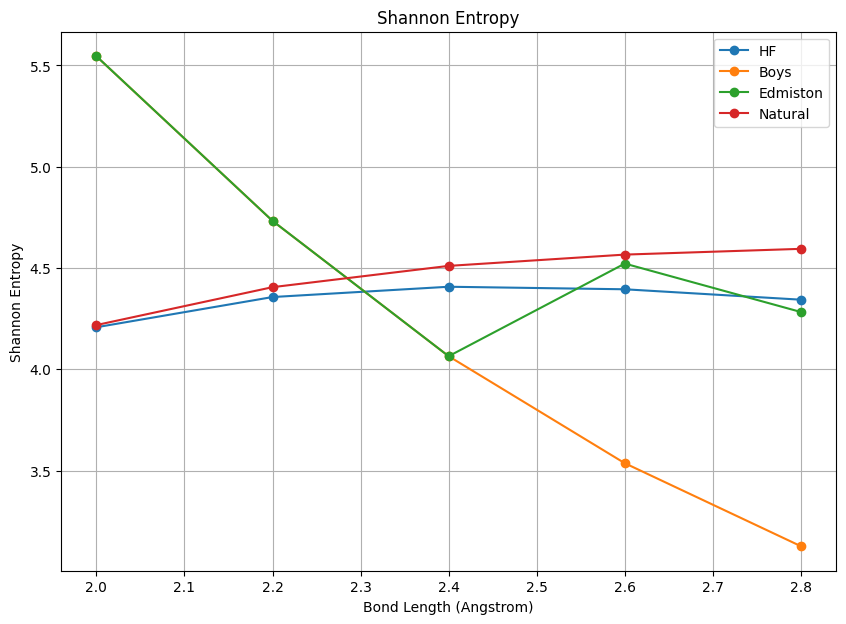

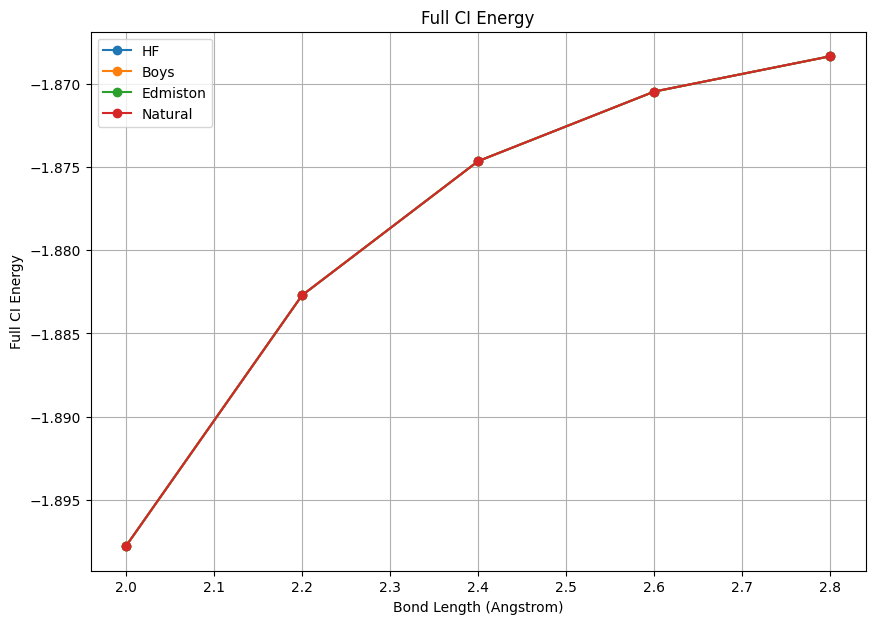

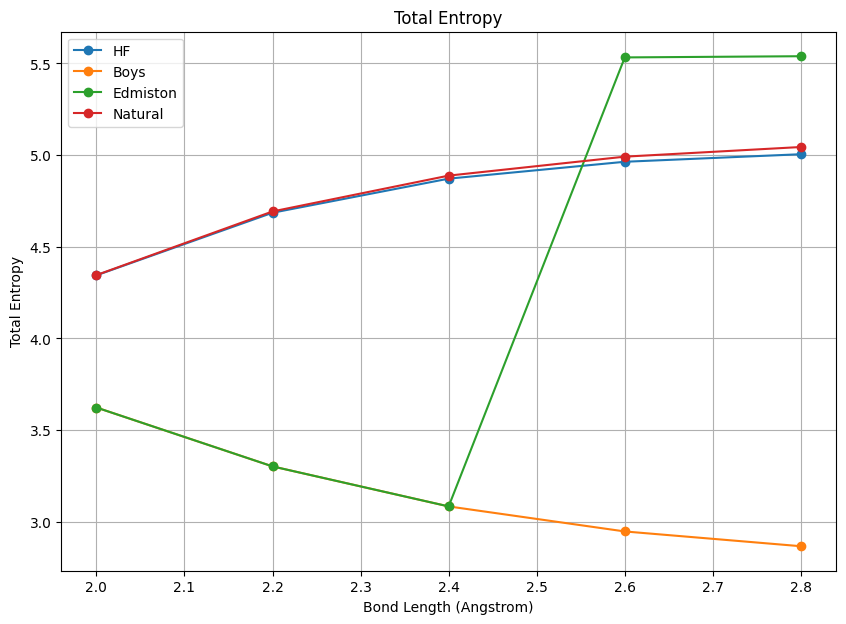

In [10]:
# Plot
names_of_orbitals = ['HF', 'Boys', 'Edmiston', 'Natural']
plot_data(bond_lengths_h, entropies, names_of_orbitals, "Shannon Entropy", "Shannon Entropy")
plot_data(bond_lengths_h, energies, names_of_orbitals, "Full CI Energy", "Full CI Energy")
plot_data(bond_lengths_h, total_entropies, names_of_orbitals, "Total Entropy", "Total Entropy")
